# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image, display
import itertools
import pandas as pd

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]
n_valid = y_valid.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation samples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation samples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

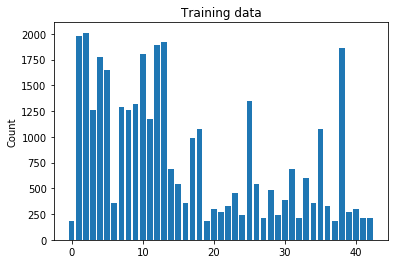

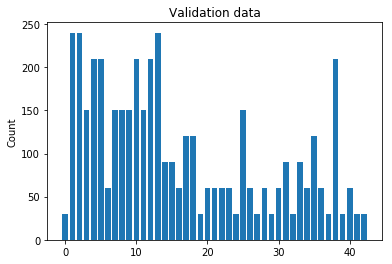

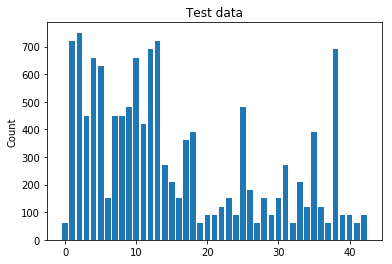

38


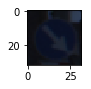

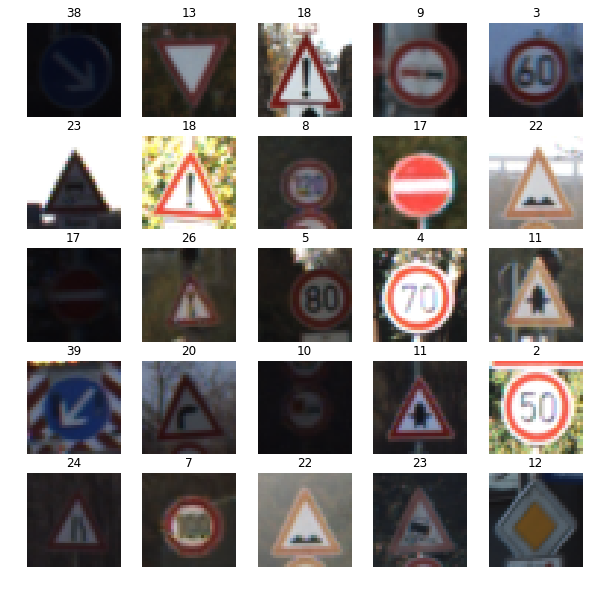

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import tensorflow as tf

# Visualizations will be shown in the notebook.
%matplotlib inline

ind = np.arange(n_classes)

fig1, ax1 = plt.subplots()
n_bins = np.bincount(y_train)
rects1 = ax1.bar(ind, n_bins)
ax1.set_ylabel('Count')
ax1.set_title('Training data')
plt.show()
fig1.savefig('training_data.png')

fig2, ax2 = plt.subplots()
n_bins = np.bincount(y_valid)
rects2 = ax2.bar(ind, n_bins)
ax2.set_ylabel('Count')
ax2.set_title('Validation data')
plt.show()
fig2.savefig('validation_data.png')

fig3, ax3 = plt.subplots()
n_bins = np.bincount(y_test)
rects3 = ax3.bar(ind, n_bins)
ax3.set_ylabel('Count')
ax3.set_title('Test data')
plt.show()
fig3.savefig('test_data.png')

index = random.randint(0, n_train)
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

figure, axes = plt.subplots(5, 5, figsize=(10,10))
axes = axes.ravel()

for i in range(0, 25):
    index = random.randint(0, n_train)
    image = X_train[index].squeeze()
    axes[i].axis('off')
    axes[i].imshow(image)
    axes[i].set_title(y_train[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Pre-process the Data Set (normalization, grayscale, etc.)

(18180, 32, 32, 3)
Mean of gray image 0.3242258393607699
Mean of normalized image 0.32120659947395325
Mean of augmented image 0.3000599145889282
(34799, 32, 32, 3)


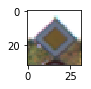

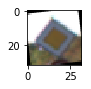

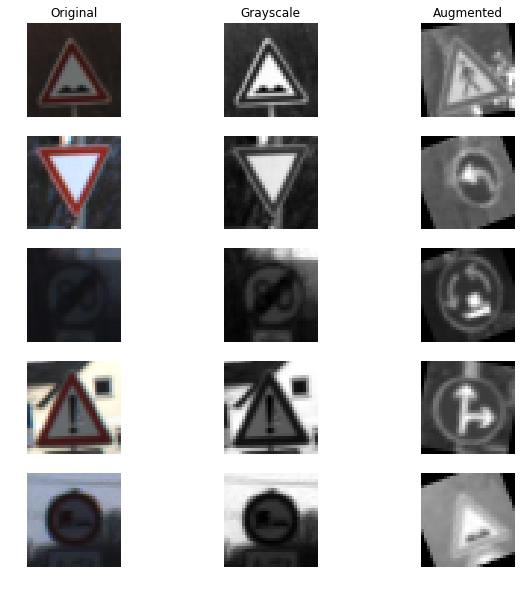

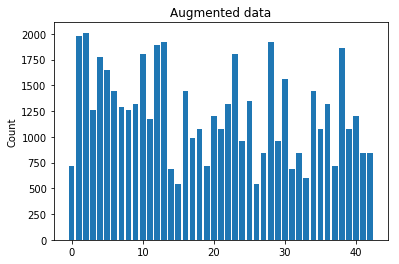

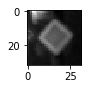

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import sys
import skimage.data
import skimage.transform
from skimage.color import rgb2gray

X_train_aug = []
y_train_aug = []

n_bins_train = np.bincount(y_train)
X_train_gray = [skimage.transform.resize(image, (32,32))
               for image in X_train]
X_train_gray = np.array(X_train_gray)
for i in range(len(X_train)):
    if (n_bins_train[y_train[i]] < 505):
        X_train_aug.append(skimage.transform.rotate(X_train[i], 10, resize=False))
        y_train_aug.append(y_train[i])
        X_train_aug.append(skimage.transform.rotate(X_train[i], 20, resize=False))
        y_train_aug.append(y_train[i])
        X_train_aug.append(skimage.transform.rotate(X_train[i], -10, resize=False))
        y_train_aug.append(y_train[i])

index = random.randint(0, n_train)
temp_image = X_train[index].squeeze()
#image = X_train_norm[index].squeeze()
fig = plt.figure(figsize=(1,1))
plt.imshow(temp_image)
plt.savefig('original_image.png')

temp_aug_image = skimage.transform.rotate(X_train[index], 10, resize=False)
temp_aug_image = np.array(temp_aug_image)
temp_aug_image = temp_aug_image.squeeze()
fig = plt.figure(figsize=(1,1))
plt.imshow(temp_aug_image)
plt.savefig('rotated_image.png')

X_train_aug = np.array(X_train_aug)
print(X_train_aug.shape)
X_valid_gray = [skimage.transform.resize(image, (32,32))
               for image in X_valid]
X_valid_gray = np.array(X_valid_gray)
X_test_gray = [skimage.transform.resize(image, (32,32))
               for image in X_test]
X_test_gray = np.array(X_test_gray)

#Convert to grayscale
with tf.Session() as tsess:
    image_t = tf.convert_to_tensor(X_train_gray, dtype=tf.float32)
    X_train_norm = tsess.run(tf.image.rgb_to_grayscale(image_t))

    image_t = tf.convert_to_tensor(X_train_aug, dtype=tf.float32)
    X_train_aug_norm = tsess.run(tf.image.rgb_to_grayscale(image_t))

    image_t = tf.convert_to_tensor(X_valid_gray, dtype=tf.float32)
    X_valid_norm = tsess.run(tf.image.rgb_to_grayscale(image_t))

    image_t = tf.convert_to_tensor(X_test_gray, dtype=tf.float32)
    X_test_norm = tsess.run(tf.image.rgb_to_grayscale(image_t))

print("Mean of gray image {0}".format(np.mean(X_train_gray)))
print("Mean of normalized image {0}".format(np.mean(X_train_norm)))
print("Mean of augmented image {0}".format(np.mean(X_train_aug_norm)))
print(X_train_gray.shape)
figure, axes = plt.subplots(5, 3, figsize=(10,10))
axes = axes.ravel()

axes[0].set_title('Original')
axes[1].set_title('Grayscale')
axes[2].set_title('Augmented')
for i in range(0, 5):
    index = random.randint(0, n_train)
    index_aug = random.randint(0, len(y_train_aug))
    image = X_train[index].squeeze()
    image_norm = X_train_norm[index].squeeze()
    image_aug = X_train_aug_norm[index_aug].squeeze()
    axes[i * 3].axis('off')
    axes[i * 3].imshow(image)
    axes[i * 3 + 1].axis('off')
    axes[i * 3 + 1].imshow(image_norm, cmap='gray')
    axes[i * 3 + 2].axis('off')
    axes[i * 3 + 2].imshow(image_aug, cmap='gray')

y_total_train = np.append(y_train, y_train_aug)
fig, ax = plt.subplots()
n_bins = np.bincount(y_total_train)
rects = ax.bar(ind, n_bins)
ax.set_ylabel('Count')
ax.set_title('Augmented data')
plt.show()
fig.savefig('augmented_data_bins.png')   # save the figure to file
plt.close(fig) 

index = random.randint(0, n_train)
image = X_train_norm[index].squeeze()
fig = plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
plt.savefig('grayscale_image.png')

### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 40
BATCH_SIZE = 128

def LeNet(x, keep_prob):
        # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x36.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 36), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(36))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    #Activation.
    conv1 = tf.nn.relu(conv1)
    
    #Pooling. Input = 28x28x36. Output = 14x14x36.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Input = 14x14x36 Output = 10x10x36.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 36, 36), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(36))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation.
    conv2 = tf.nn.relu(conv2)
    
    #Pooling. Input = 10x10x36. Output = 5x5x36.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Input = 5x5x36 Output = 5x5x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 36, 16), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(16))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    #Activation.
    conv3 = tf.nn.relu(conv3)

    #Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv3)
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)
    
    #Layer 4: Fully Connected. Input = 120. Output = 96.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 96), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(96))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    #Layer 5: Fully Connected. Input = 96. Output = 96.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(96, 96), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(96))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    #Activation.
    fc3    = tf.nn.relu(fc3)
    
    #Layer 6: Fully Connected. Input = 96. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(96, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)
rate = tf.placeholder(tf.float32)

In [7]:
logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(None, one_hot_y, logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [8]:
expected_label = tf.argmax(one_hot_y, 1)
predicted_label = tf.argmax(logits, 1)
correct_prediction = tf.equal(expected_label, predicted_label)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
import gc
max_accuracy = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    aug_examples = len(X_train_aug)
    batch_count = 0
    
    print("Training...")
    print()
    validation_accuracy = 0
    training_accuracy = 0
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        X_train_aug_norm, y_train_aug = shuffle(X_train_aug_norm, y_train_aug)
        batch_count = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            batch_count = batch_count + 1
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5, rate: 0.001})
            sys.stdout.write("\rEPOCH {0} Batch {1} Validation Accuracy = {2:.3f}".format(i+1, batch_count, validation_accuracy))
            sys.stdout.flush()
        for offset in range(0, aug_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_aug_norm[offset:end], y_train_aug[offset:end]
            batch_count = batch_count + 1
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5, rate: 0.001})
            sys.stdout.write("\rEPOCH {0} Batch {1} Validation Accuracy = {2:.3f} Training Accuracy = {3:.3f}".format(i+1, batch_count, validation_accuracy, training_accuracy))
            sys.stdout.flush()

        training_accuracy = evaluate(X_train_norm, y_train)
        training_accuracy_aug = evaluate(X_train_aug_norm, y_train_aug)
        training_accuracy = (training_accuracy + training_accuracy_aug)/2
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        sys.stdout.write("\rEPOCH {0} Batch {1} Validation Accuracy = {2:.3f} Training Accuracy = {3:.3f}".format(i+1, batch_count, validation_accuracy, training_accuracy))
        sys.stdout.flush()

        if (validation_accuracy > max_accuracy):
            max_accuracy = validation_accuracy
            saver.save(sess, './traffic_sign')

print("Max accuracy {0:.3f}".format(max_accuracy))

Training...

EPOCH 40 Batch 415 Validation Accuracy = 0.967 Training Accuracy = 0.995Max accuracy 0.967


In [11]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

    num_samples = len(y_test)
    print("Num of test samples {0}".format(num_samples))
    y_label = np.zeros((num_samples))    
    y_label = sess.run(predicted_label, feed_dict={x: X_test_norm, keep_prob: 1.0})
    print(classification_report(y_test, y_label))

Test Accuracy = 0.935
Num of test samples 12630
             precision    recall  f1-score   support

          0       0.92      1.00      0.96        60
          1       0.96      0.97      0.96       720
          2       0.98      0.98      0.98       750
          3       0.96      0.94      0.95       450
          4       0.96      0.97      0.96       660
          5       0.93      0.90      0.91       630
          6       0.89      0.97      0.93       150
          7       0.98      0.89      0.93       450
          8       0.92      0.92      0.92       450
          9       0.99      0.99      0.99       480
         10       1.00      0.95      0.97       660
         11       0.98      0.85      0.91       420
         12       0.99      0.97      0.98       690
         13       0.99      0.99      0.99       720
         14       0.98      0.96      0.97       270
         15       0.97      0.98      0.97       210
         16       0.97      1.00      0.98       1

### Load and Output the Images

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import skimage.data
import skimage.transform
from skimage.color import rgb2gray

test_images = []
test_images_gray = []
test_label = np.array([13, 9, 4, 17, 8])

test_images.append(skimage.data.imread('02089.ppm'))
test_images.append(skimage.data.imread('07349.ppm'))
test_images.append(skimage.data.imread('08414.ppm'))
test_images.append(skimage.data.imread('11567.ppm'))
test_images.append(skimage.data.imread('12618.ppm'))

test_images32 = [skimage.transform.resize(image, (32, 32))
                for image in test_images]

test_images_norm = np.array(test_images32)

### Predict the Sign Type for Each Image

Predicted label [13  9  4 17  8]


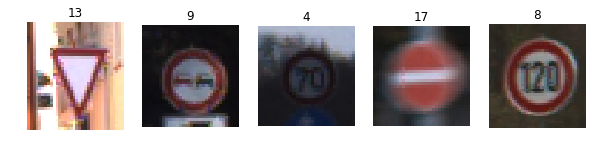

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    image_t = tf.convert_to_tensor(test_images_norm, dtype=tf.float32)
    image_t = sess.run(tf.image.rgb_to_grayscale(image_t))
      
    pred_label = sess.run(predicted_label, feed_dict={x: image_t, keep_prob: 1.0})
    print("Predicted label {0}".format(pred_label))
    
    figure, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.ravel()

    for i in range(0, 5):
        axes[i].axis('off')
        axes[i].imshow(test_images[i])
        axes[i].set_title(pred_label[i])
        figure.savefig('Test_image_{0}'.format(i))

### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(image_t, test_label)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

TopKV2(values=array([[ 54.68454361,  26.14458847,  17.03026962,  11.43200302,  10.9722805 ],
       [ 31.00508881,  14.43451977,  12.44302273,   9.98847008,
          7.22226572],
       [ 18.71487617,   6.70665169,   5.77361202,   5.16552877,
          5.00545883],
       [ 22.68779182,   6.90625   ,   6.4514327 ,   6.08669996,
          4.87738752],
       [ 21.251091  ,   7.57531595,   7.45624876,   7.1831584 ,
          7.18111992]], dtype=float32), indices=array([[13, 36, 15, 22, 38],
       [ 9, 10, 16, 41, 19],
       [ 4,  0, 14, 15,  1],
       [17, 36, 37, 34, 41],
       [ 8,  7,  0,  4, 37]], dtype=int32))


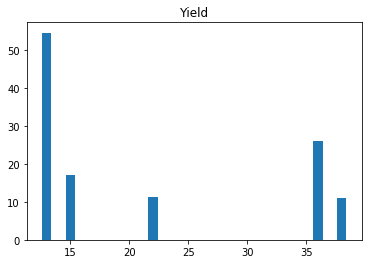

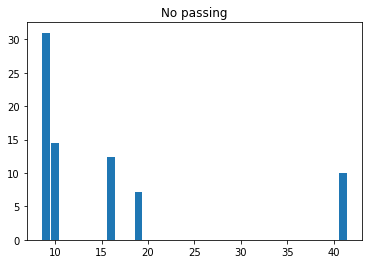

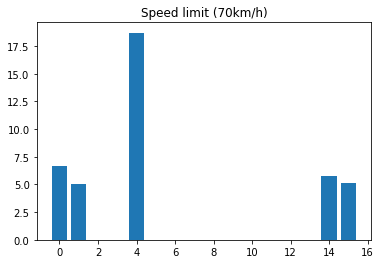

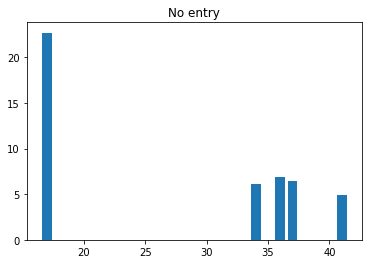

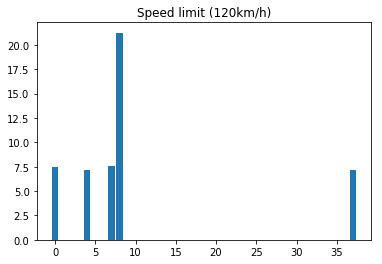

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    image_name = ["Yield", "No passing", "Speed limit (70km/h)", "No entry", "Speed limit (120km/h)"]
    results = sess.run(logits, feed_dict={x: image_t, keep_prob: 1.0})
    probs = sess.run(tf.nn.top_k(tf.constant(results), k=5))
    print(probs)
    for i in range(5):
        fig1, ax1 = plt.subplots()
        rects1 = ax1.bar(probs.indices[i], probs.values[i])
        ax1.set_title("{0}".format(image_name[i]))
        plt.show()
        fig1.savefig("probability_image_{0}".format(i))

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 